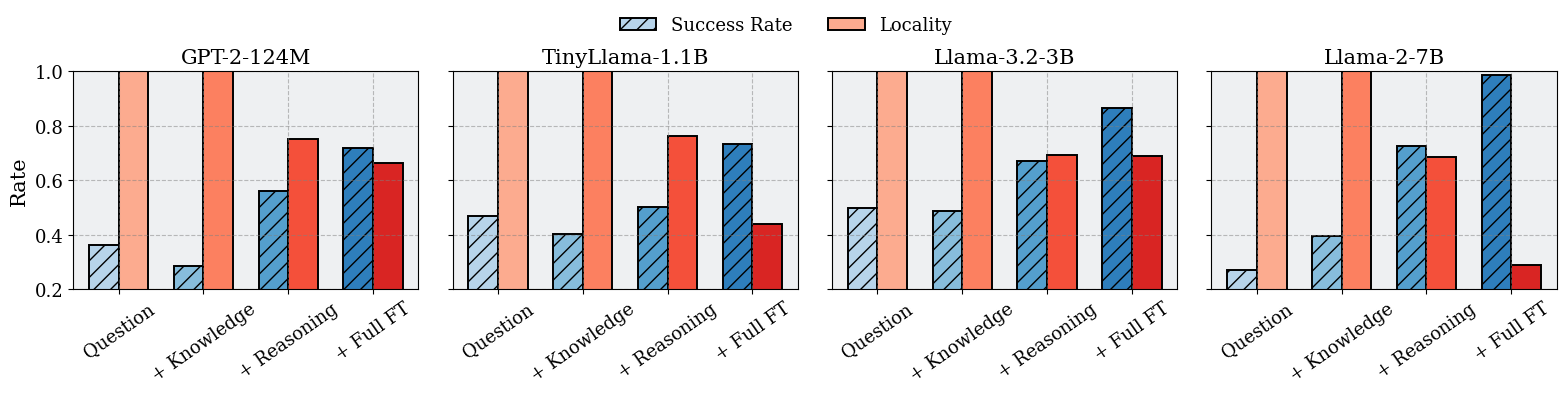

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams

# ── Styling (unchanged except for size tweak) ────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ── Data (first four = success, last four = locality) ───────────────────
raw = [
    [0.364, 0.286, 0.560, 0.718],   # success  GPT-2-125M
    [0.470, 0.403, 0.503, 0.734],
    [0.499, 0.487, 0.671, 0.867],
    [0.270, 0.395, 0.726, 0.986],
    [1.000, 1.000, 0.753, 0.663],   # locality GPT-2-125M
    [1.000, 1.000, 0.763, 0.440],
    [1.000, 1.000, 0.693, 0.691],
    [1.000, 1.000, 0.687, 0.290],
]
succ, loc = raw[:4], raw[4:]

model_names = ['GPT-2-124M', 'TinyLlama-1.1B',
               'Llama-3.2-3B', 'Llama-2-7B']
cot_ids  = ['Question', '+ Knowledge', '+ Reasoning', '+ Full FT']
x        = np.arange(len(cot_ids))
bar_w    = 0.35

# two separate light→dark palettes
pal_succ = cm.Blues(np.linspace(0.30, 0.70, 4))
pal_loc  = cm.Reds(np.linspace(0.30, 0.70, 4))

fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

for m, ax in enumerate(axs):
    for k in range(4):
        # Success bar: hatched, blue shade
        ax.bar(x[k] - bar_w/2, succ[m][k],
               width=bar_w, color=pal_succ[k],
               edgecolor='black', linewidth=1.4,
               hatch='//', label='Success Rate' if k == 0 else "")

        # Locality bar: solid, orange shade
        ax.bar(x[k] + bar_w/2, loc[m][k],
               width=bar_w, color=pal_loc[k],
               edgecolor='black', linewidth=1.4,
               label='Locality' if k == 0 else "")

    ax.set_ylim(0.2, 1.0)
    ax.set_xticks(x)
    ax.set_xticklabels(cot_ids, rotation=35)
    ax.tick_params(axis='both', labelsize=13)
    ax.set_title(model_names[m], fontsize=15)

# ── One legend centred above all sub-plots ───────────────────────────────
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels,
           loc='upper center', ncol=2, fontsize=13,
           bbox_to_anchor=(0.5, 1.02), frameon=False)

axs[0].set_ylabel('Rate', fontsize=15)
fig.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for legend
plt.savefig('figures/combined_bars_gradual_dual_palette.pdf',
            dpi=600, bbox_inches='tight')
plt.show()

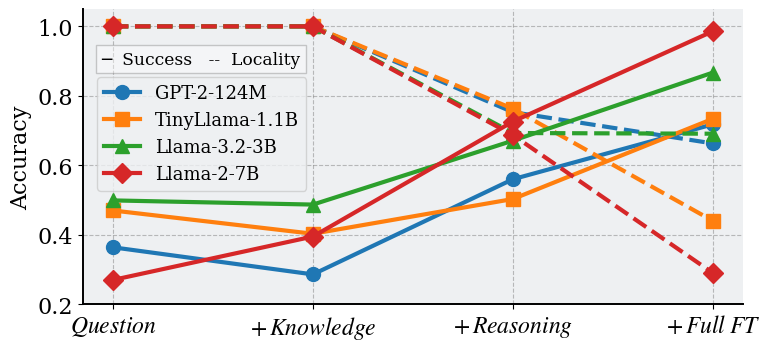

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams

# ---- Styling ------------------------------------------------------------
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ---- Data (first four = success, last four = locality) ------------------
raw = [
    [0.364, 0.286, 0.560, 0.718],   # success  GPT-2-125M
    [0.470, 0.403, 0.503, 0.734],
    [0.499, 0.487, 0.671, 0.867],
    [0.270, 0.395, 0.726, 0.986],
    [1.000, 1.000, 0.753, 0.663],   # locality GPT-2-125M
    [1.000, 1.000, 0.763, 0.440],
    [1.000, 1.000, 0.693, 0.691],
    [1.000, 1.000, 0.687, 0.290],
]
succ, loc = raw[:4], raw[4:]

model_names = ['GPT-2-124M', 'TinyLlama-1.1B',
               'Llama-3.2-3B', 'Llama-2-7B']
cot_ids  = ['Question', '+ Knowledge', '+ Reasoning', '+ Full FT']
cot_ids = [
    r'$\mathit{Question}$',           # italic
    r'$\mathit{+\,Knowledge}$',       # italic
    r'$\mathit{+\,Reasoning}$',       # italic
    r'$\mathit{+\,Full\;FT}$'         # bold
]
x        = np.arange(len(cot_ids))

# ---- Plotting -----------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 4))


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red
markers = ['o', 's', '^', 'D']  # different dot shapes for models

for m, model in enumerate(model_names):
    # Success (solid)
    ax.plot(x, succ[m], label=model,
            color=colors[m], marker=markers[m], linestyle='-',
            linewidth=3, markersize=10)
    
    # Locality (dashed) -- no extra legend entry
    ax.plot(x, loc[m], color=colors[m], marker=markers[m],
            linestyle='--', linewidth=3, markersize=10, label="_nolegend_")

# axes settings
ax.set_ylim(0.2, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(cot_ids, rotation=0, fontsize=17)
ax.set_ylabel('Accuracy', fontsize=16)
# ax.set_title('Success vs. Locality across Editing Settings')

# Main legend (models only)
ax.legend(loc='upper center', bbox_to_anchor=(0.18, 0.8),
          ncol=1, frameon=True, fontsize=13)

# Inline annotation for metric line styles
ax.text(0.028, 0.83, '─  Success   --  Locality',
        transform=ax.transAxes, fontsize=12.3,
        verticalalignment='center', bbox=dict(facecolor='white', alpha=0.4, edgecolor='gray'))

# border line removal (up)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# left and bottom lines
ax.spines['left'].set_linewidth(1.4)
ax.spines['bottom'].set_linewidth(1.4)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('figures/line_preliminary.pdf',
            dpi=600, bbox_inches='tight')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams

# ---- Styling ------------------------------------------------------------
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ---- Data (first four = success, last four = locality) ------------------
raw = [
    [0.364, 0.286, 0.560, 0.718],   # success  GPT-2-125M
    [0.470, 0.403, 0.503, 0.734],
    [0.499, 0.487, 0.671, 0.867],
    [0.270, 0.395, 0.726, 0.986],
    [1.000, 1.000, 0.753, 0.663],   # locality GPT-2-125M
    [1.000, 1.000, 0.763, 0.440],
    [1.000, 1.000, 0.693, 0.691],
    [1.000, 1.000, 0.687, 0.290],
]
succ, loc = raw[:4], raw[4:]

model_names = ['GPT-2-124M', 'TinyLlama-1.1B',
               'Llama-3.2-3B', 'Llama-2-7B']
cot_ids  = ['Question', '+ Knowledge', '+ Reasoning', '+ Full FT']
cot_ids = [
    r'$\mathit{Question}$',           # italic
    r'$\mathit{+\,Knowledge}$',       # italic
    r'$\mathit{+\,Reasoning}$',       # italic
    r'$\mathit{+\,Full\;FT}$'         # bold
]
x        = np.arange(len(cot_ids))

# ---- Plotting -----------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 4))


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red
markers = ['o', 's', '^', 'D']  # different dot shapes for models

for m, model in enumerate(model_names):
    # Success (solid)
    ax.plot(x, succ[m], label=model,
            color=colors[m], marker=markers[m], linestyle='-',
            linewidth=3, markersize=10)
    
    # Locality (dashed) -- no extra legend entry
    ax.plot(x, loc[m], color=colors[m], marker=markers[m],
            linestyle='--', linewidth=3, markersize=10, label="_nolegend_")

# axes settings
ax.set_ylim(0.2, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(cot_ids, rotation=0, fontsize=17)
ax.set_ylabel('Accuracy', fontsize=16)
# ax.set_title('Success vs. Locality across Editing Settings')

# Main legend (models only)
ax.legend(loc='upper center', bbox_to_anchor=(0.18, 0.8),
          ncol=1, frameon=True, fontsize=13)

# Inline annotation for metric line styles
ax.text(0.028, 0.83, '─  Success   --  Locality',
        transform=ax.transAxes, fontsize=12.3,
        verticalalignment='center', bbox=dict(facecolor='white', alpha=0.4, edgecolor='gray'))

# border line removal (up)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# left and bottom lines
ax.spines['left'].set_linewidth(1.4)
ax.spines['bottom'].set_linewidth(1.4)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('figures/line_preliminary.pdf',
            dpi=600, bbox_inches='tight')